## Imports

In [10]:
from data.preparation.DataHandler import DataHandler
from data.preparation.DataPreprocessor import DataPreprocessor
from data.preparation.imputers.DropnaImputer import DropnaImputer
from data.preparation.parsers.CSVParser import CSVParser
from data.preparation.scalers.MinMaxScalerWrapper import MinMaxScalerWrapper
from data.preparation.splitters.SklearnDataSplitter import SklearnDataSplitter

from models.LSTMModel import LSTMModel
from models.loss.KerasLoss import KerasLoss
from visualisations.Visualisation import Visualisation

## Component initialization

In [11]:
parser = CSVParser()
data_preprocessor = DataPreprocessor()
min_max_scaler = MinMaxScalerWrapper()
imputer = DropnaImputer()
data_manager = DataHandler()
LSTM_model = LSTMModel(data_manager)
visualisation = Visualisation(labels=("Time", "Wind Speed"))


## Load data

In [12]:
print("Loading data...")
data = parser.parse('knmi.csv', ";")

Loading data...


## Data preprocessing

In [13]:
print("Data preprocessing...")
data_preprocessor.load_data(data)
data_preprocessor.handle_missing_values(imputer)
data_preprocessor.data = data_preprocessor.data.replace(' ', '', regex=True)
object_columns = data_preprocessor.data.select_dtypes(include=['object']).columns
data_preprocessor.data = data_preprocessor.data.drop(object_columns, axis=1)
data_preprocessor.data.set_index('YYYYMMDD', inplace=True)
data_preprocessor.data.sort_index(inplace=True)
data_preprocessor.scale_features(min_max_scaler)

Data preprocessing...


## Prepare data for training

In [14]:
print("Preparing data for training...")
data_manager.load_data(data_preprocessor.data, 'FHVEC')
data_manager.split_data(SklearnDataSplitter())

Preparing data for training...


## Train LSTM model

In [15]:
print("Training LSTM model...")
loss_function = KerasLoss(loss_function='mean_squared_error', optimizer='adam')
LSTM_model.fit(loss_function, epochs=10, batch_size=32)

Training LSTM model...
Epoch 1/10
18/18 [==============================] - 1s 3ms/step - loss: 0.0458
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0384
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0365
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0340
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 10/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0181


## Evaluate the model

In [16]:
print("Evaluating the model...")
loss = LSTM_model.evaluate()
print('Loss:', loss)

Evaluating the model...
5/5 [==============================] - 0s 1ms/step - loss: 0.0160
Loss: 0.015978606417775154


### Make predictions and visualize the results

Making predictions and visualizing the results...
5/5 [==============================] - 0s 1ms/step


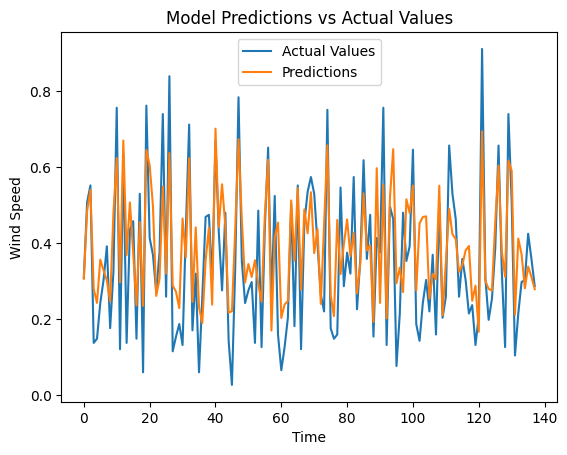

In [17]:
print("Making predictions and visualizing the results...")
predictions = LSTM_model.predict()
y_test = data_manager.get_test_data()[1]
visualisation.plot(y_test, predictions)